# P3. Exploration SQL

Le répertoire `/db` contient une base de données SQLite3 `olympics.sqbpro` reprenant les résultats des épreuves des jeux d'été pour une période donnée (cf P1 & P2).

On s'intéresse dans le cadre de cette partie P3 à l'exploration via SQL des résultats des JO d'été (table : `summer`).

---

### Question 1: Qu'est ce que SQL ?

SQL (Structured Query Langage) est un langage de base de données relationnelle. 
Il permet:
    - La création de base et des tables.
    - L'ajout d'enregistrements sous forme de lignes.
    - L'interrogation de la base.
    - La mise à jour.
    - Le changement de structure de la table: ajout, suppression de colonnes.
    - La gestion de droits d'utilisateurs de la base.
    
Un langage universel
Les commandes SQL sont proches du langage naturel, c'était le but du langage dont les principes ont été posés par Edgar F. Codd, et repris par IBM dans SEQUEL (Structured English Query Language), renommé ensuite SQL. Cependant la première version commerciale basée sur SEQUEL l'a été par Relational Software, devenue depuis Oracle.

La norme ISO SQL-92 ou SQL-2 a été définie en 1992 et est couramment employée.
Cependant de nouvelles normes lui ont succédé, par forcément implémentées sur tous les logiciels.
La norme ISO SQL:2006 permet de gérer les fichiers XML, notamment importer des données XML dans une base de donnée ou exporter son contenu en XML.
Ce sont surtout ces normes qui font la différence. Quel que soit le logiciel utilisé, MySQL (ou MariaDB), PostgreSQL ou Oracle, ou même les gestionnaires dit NoSQL comme Cassandra, on retrouvera la même syntaxe, avec des différences mineures.

Source: https://www.scriptol.fr/sql/sql-introduction.php


### Question 2: Qu'est ce que SQLite 3 ? Avantages et/ou Inconvénients ?

Différence entre MySQL et SQLite
MySQL est l'un des systèmes de gestion de bases de données relationnelles open source les plus populaires et les plus appréciés. Il est largement utilisé dans de nombreuses applications industrielles à petite et grande échelle et capable de gérer un grand volume de données. MySQL prend en charge le langage SQL (Structured Query Language) standard. Il est écrit en langage C et C ++ et développé par Michael Widenius et David Axmark en 1994. Actuellement, Oracle Corporation développe, distribue et prend en charge l'application MySQL.

SQLite est une bibliothèque écrite en langage C qui implémente une base de données SQL sans serveur, sans configuration et sans transaction. Contrairement aux autres moteurs de base de données SQL, il n'a pas de serveur séparé. Il utilise un fichier disque ordinaire pour son opération de lecture et d'écriture. Le fichier de base de données SQLite est multiplateforme et est facilement copié entre les systèmes d'exploitation 32 bits et 64 bits.

Source: https://fr.photo-555.com/4341906-mysql-vs-sqlite

### Question 3: Donner des exemples d'autres formats de fichier pouvant être utilisé pour fournir des données similaires 

XML et non-XML .xls .xml .vs .xlsx .ods.sqlite2 .sqlite1

### Question 4: Quel est le type (texte ou binaire) du fichier base de données SQLite3?

Le fichier `olympics.sqbpro` est un fichier binaire

### Question 5: Donner les caractéristiques de la table `summer` ? 

Le fichier contient 9 colonnes, 31.165 lignes, 280.490 cellules Taille du fichier 2,48 Mo (2 605 087 Octets)
Détail des colonnes : Year	City	Sport	Discipline	Athlete	Country	Gender	Event	Medal

---
### Question 6: Combien d'enregistrements possède la table `summer` ?

In [ ]:
Réponse : 31.165 enregistrements

SQL:
SELECT count(*)
FROM summer

### Question 7: Quelle période des JO couvre ce fichier de résultats ?

In [ ]:
Réponse : De 1896 à 2012

SQL:
SELECT MIN(Year), MAX(Year)
FROM summer

### Question 8: Indiquer les années et villes des olympiades ? 

In [ ]:
SQL:
SELECT Year, City
FROM summer
GROUP BY Year

In [ ]:
1896	Athens
1900	Paris
1904	St Louis
1908	London
1912	Stockholm
1920	Antwerp
1924	Paris
1928	Amsterdam
1932	Los Angeles
1936	Berlin
1948	London
1952	Helsinki
1956	Melbourne / Stockholm
1960	Rome
1964	Tokyo
1968	Mexico
1972	Munich
1976	Montreal
1980	Moscow
1984	Los Angeles
1988	Seoul
1992	Barcelona
1996	Atlanta
2000	Sydney
2004	Athens
2008	Beijing
2012	London

### Q1. Combien la France a remporté de médailles d’or aux JO de 1984 ? (Christophe)

In [ ]:
Réponse : 21

SQL :
SELECT count(*) AS TotalMedailles
FROM summer
WHERE Year = 1984 AND Country = 'FRA' AND Medal = 'Gold'

Réponse : 5
    
SQL:
SELECT count(*) AS TotalMedaillesOr
FROM(
	SELECT DISTINCT Sport, Discipline, Event, Gender
	FROM summer
	WHERE year = 1984 AND Country = 'FRA' AND Medal = 'Gold'
	GROUP BY Sport, Discipline, Event, Gender)

![Q1](screenshots/q1.png)

<img scr=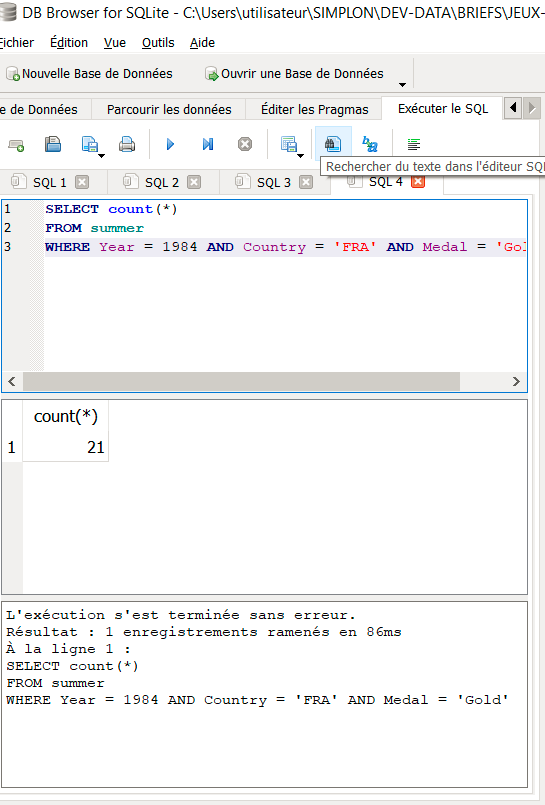>

### Q2. Quel pays a le plus d’athlètes toutes années confondues ? (Matthias)

In [ ]:
Réponse : USA, 3.149

SQL:
SELECT Country AS Pays, Count(DISTINCT Athlete) AS NbAtheletes
FROM summer
GROUP BY Country
ORDER BY NbAtheletes DESC
LIMIT 1

![Q2](screenshots/q2.png)

### Q3. En 2012 combien de médailles le Japon a t-il gagné ? (Théo)

In [ ]:
Réponse : 84

SQL :
SELECT count(Medal)
FROM summer
WHERE Country = 'JPN' AND Year = 2012

![Q3](screenshots/q3.png)

### Q4. Dans quels différents sports les Grecs ont-ils gagné des médailles ? (Corentin L)

In [ ]:
Réponse :
Aquatics
Athletics
Cycling
Fencing
Gymnastics
Judo
Rowing
Sailing
Shooting
Taekwondo
Tennis
Weightlifting
Wrestling

In [ ]:
SQL:
SELECT Sport AS ListeSports
FROM summer
WHERE Country = 'GRE'
GROUP BY Sport

![Q4](screenshots/q4.png)

### Q5. Quel pays a remporté le plus de médailles d’or ? (Philippe)

In [ ]:
Réponse : USA, 2.235

SQL:
SELECT Country AS Pays, count(Medal) AS Medailles
FROM summer
WHERE Medal = 'Gold'
GROUP BY Country
ORDER BY Medailles DESC
LIMIT 5

![Q5](screenshots/q5.png)

### Q6. Combien de villes différentes ont accueilli les JO d’été entre 1896 et 2012 ? (Yoann)

In [ ]:
Réponse : 22

SQL:
SELECT count(DISTINCT City) AS NbCity
FROM summer

![Q6](screenshots/q6.png)

### Q7. Combien de femmes ont obtenu  une médaille d’or ? (Lamia)

In [ ]:
Réponse : 2.788 Femmes

SQL:
SELECT count(Gender) AS NbWomen
FROM summer
WHERE Gender = 'Women' AND Medal = 'Gold'

![Q7](screenshots/q7.png)

### Q8. Combien de sports différents sont représentés par année ? (Joris)

In [ ]:
Réponse:
1896	9
1900	19
1904	16
1908	22
1912	14
1920	22
1924	17
1928	14
1932	14
1936	19
1948	17
1952	17
1956	17
1960	17
1964	19
1968	18
1972	21
1976	21
1980	21
1984	21
1988	23
1992	25
1996	26
2000	28
2004	28
2008	28
2012	26

In [ ]:
SQL:
SELECT Year as Year, count(DISTINCT Sport) AS Sport
FROM summer
GROUP BY year

![Q8](screenshots/q8.png)

### Q9. Combien de fois Londres a accueilli les J.O ? (Marvin)

In [ ]:
Réponse : 3 fois

SQL:
SELECT city, count(DISTINCT Year) AS NombreDeFoisJO
FROM summer
WHERE City = 'London'

![Q9](screenshots/q9.png)

### Q10. Combien de joueuses comptait la sélection brésilienne de volley-ball - médaillée d’or aux J.O de 2012 ? (Corentin P)

In [ ]:
Réponse : 12 Médailles d'or

SQL:
SELECT Country AS Pays, Count(DISTINCT Athlete) AS NbAthletes, Medal AS Medailles
FROM summer
WHERE Country = 'BRA' AND Medal= 'Gold' AND Year = 2012 AND Sport = 'Volleyball'


![Q10](screenshots/q10.png)

### Q11. Combien de femmes françaises ont participé en 2012 , quel sont leurs - médailles ? (izak)

In [ ]:
Réponse : 29 Femmes / 31 Médailles

SQL:
SELECT Country AS Pays, Count(DISTINCT Athlete) AS NbAthletes, count(Medal) AS NbMedailles
FROM summer
WHERE Country = 'FRA' AND Year = 2012 AND Gender = 'Women'

![Q11](screenshots/q11.png)

### Q12. Quel est l’athlète qui a remporté le plus de médailles d’or ? (mayel)

In [ ]:
Réponse : PHELPS, Michael	18

SQL :
SELECT Athlete, count(Medal) AS NBMedailles
FROM summer
WHERE Medal = 'Gold'
GROUP BY Athlete
ORDER BY count(Medal) DESC
LIMIT 5

![Q12](screenshots/q12.png)

### Q13. Est-ce que la France a déjà gagné une médaille d’or au cricket ? - (jordan)

In [ ]:
Réponse : 0
    
SQL:
SELECT Country, count(Medal) AS NbMedaille, Sport
FROM summer
WHERE Country = 'FRA' AND Medal = 'Gold' AND Sport = 'Cricket'

![Q13](screenshots/q13.png)

### Q14. Combien de médaillés ont un nom de famille de plus de 6 lettres en - excluant les années paires ? (jonathan)

In [ ]:
Réponse : 0 !

### Q15. Le nombre de médailles d’or par pays en 2012 (Maëlle)

In [ ]:
Réponse : 56 pays

SQL:
SELECT Year, Country, count(Medal) AS NbMedaille
FROM summer
WHERE Medal = 'Gold' AND Year = 2012
GROUP BY Country
ORDER BY NbMedaille DESC

![Q15](screenshots/q15.png)

### Q16. Combien de femmes ont remporté des médailles ? (Alicia)

In [ ]:
Réponse : 5.838 Femmes

SQL:
SELECT Gender, count(DISTINCT Athlete) AS NbAtheletes
FROM summer
WHERE Gender = 'Women'

![Q16](screenshots/q16.png)

### Q17. Entre 1984 et 2012 combien de médailles a gagné la France ? (Abire)

In [ ]:
Réponse : 482

SQL :
SELECT count(Medal)
FROM summer
WHERE Country = 'FRA' AND Year BETWEEN 1984 AND 2012

![Q17](screenshots/q17.png)

--- 

Fin